In [1]:
# Implementer la regression logistique avec la librairie
# Experimenter avec plus de regularisations (L1, L2, Aucune)
# Effectuer une recherche des meilleurs hyperparametres avec GridSearch
# Interpreter les features les plus importantes

In [2]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression  
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

Features dimension: (160000, 40959)
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      7984
           1       0.47      0.43      0.45      8009
           2       0.46      0.46      0.46      7932
           3       0.54      0.49      0.51      7999
           4       0.71      0.76      0.73      8076

    accuracy                           0.57     40000
   macro avg       0.56      0.57      0.56     40000
weighted avg       0.56      0.57      0.56     40000



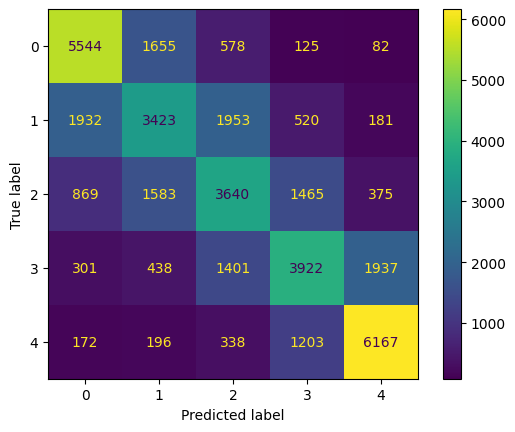

In [3]:
# Classifier from previous course


df_train = pd.read_json('data/train.jsonl', lines=True)
df_test = pd.read_json('data/en_test.jsonl', lines=True)
df_validation = pd.read_json('data/en_validation.jsonl', lines=True)



#print(df_train.columns)
#print(df_test)
#print(df_validation)

def to_positiv_negativ(grade):
    if (grade >= 3):
        return 1
    else:
        return 0

df_train["positif"] = df_train["label"].apply(lambda x : to_positiv_negativ(x))

X=df_train['text']
y=df_train['label']
#y=df_train['positif']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(ngram_range = (1,1)), MultinomialNB())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()


#print(df_train)

In [4]:
#display(df_train)

/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Features dimension: (160000, 4105027)
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67      7984
           1       0.48      0.45      0.47      8009
           2       0.49      0.46      0.48      7932
           3       0.56      0.51      0.53      7999
           4       0.69      0.78      0.73      8076

    accuracy                           0.58     40000
   macro avg       0.57      0.58      0.57     40000
weighted avg       0.57      0.58      0.58     40000



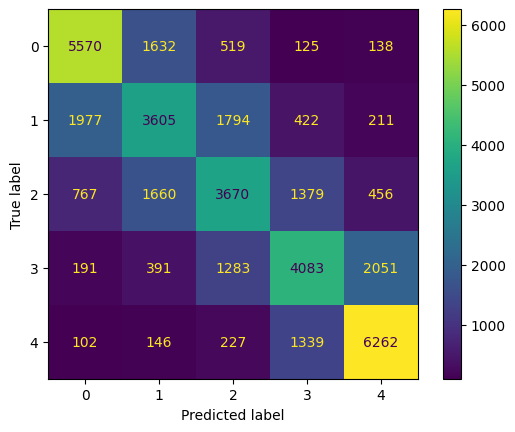

In [5]:
df_train["positif"] = df_train["label"].apply(lambda x : to_positiv_negativ(x))

X=df_train['text']
y=df_train['label']
#y=df_train['positif']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(ngram_range = (2,3)), LogisticRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()
